# Exponetial Smoothing

Is a broadly accurate forecasting method for short-term forecasting. The technique assigns larger weights to more recent observations while assigning exponantially decreasing weights as the observations get increasingly distant. This method produces slightly unreliable long-term forecasts.

In [220]:
# !pip install pandas
# !pip install numpy
# !pip install pyarrow
# !pip install statsmodel

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

Remember to change the file path below 

In [237]:
df = pd.read_csv('/home/hallzero/Downloads/dataset.csv')
# df = pd.read_parquet('path_to_parquet', engine='pyarrow')

for columns in df.columns:
    df[columns].ffill(axis=0, inplace=True)
    df[columns].bfill(axis=0, inplace=True)

df.columns

Index(['Unnamed: 0', 'recording_time', 'data_voo', 'aircraftSerNum-1',
       'amscChBasHealthStatus-1b', 'amscChBasHealthStatus-1a',
       'amscChBasHealthStatus-2b', 'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b',
       'amscHprsovDrivF-2b', 'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b',
       'amscPrsovDrivF-2b', 'basBleedLowPressF-1a', 'basBleedLowPressF-2b',
       'basBleedLowTempF-1a', 'basBleedLowTempF-2b', 'basBleedOverPressF-1a',
       'basBleedOverPressF-2b', 'basBleedOverTempF-1a', 'basBleedOverTempF-2b',
       'bleedAcsBleedConfigStatus-1b', 'bleedAcsBleedConfigStatus-2b',
       'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a',
       'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b',
       'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
       'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
       'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
       'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
       'bleedHprsovOpPosStatus-2b'

In [238]:
def analyze_column(dataframe: pd.DataFrame, column: str):
    temporal_analysis = pd.Series(dataframe[column].values, dataframe['recording_time'].values)
    return temporal_analysis

In [239]:
def concatenateTime(dataframe: pd.DataFrame):

    cols = ['timeHours-1', 'timeMinutes-1', 'timeSeconds-1']
    df2 = dataframe[cols] = dataframe[cols].dropna().astype(int)
    df2 = df2.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
    dataframe['Datetime'] = df2
    dataframe = dataframe.drop(columns=cols, axis=1)
    dataframe['Datetime'].ffill(axis=0, inplace=True)
    dataframe['Datetime'].bfill(axis=0, inplace=True)
    return dataframe

In [240]:
df = concatenateTime(df)
df

,Unnamed: 0,recording_time,data_voo,aircraftSerNum-1,amscChBasHealthStatus-1b,amscChBasHealthStatus-1a,amscChBasHealthStatus-2b,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,...,correctedN1Speed-3a,message0418DAA-1,message0422DAA-1,messageInhibitPhases-1,phaseOfFlight-1,phaseOfFlightNavigation-1,sfyBasFaultWord1Bit13-1a,sfyBasFaultWord1Bit13-2b,bleed_fail,Datetime
0,0,0,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.781250,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,134820
1,100,5000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,134824
2,200,10000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,134829
3,300,15000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,134834
4,400,20000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1,134839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,152300,7615000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.765625,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0,45218
19269,152400,7620000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.734375,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0,45223
19270,152500,7625000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.906250,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0,45228
19271,152600,7630000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.187500,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0,45233


In [241]:
def getDifferenceBetweenColumns(dataframe: pd.DataFrame):
    combined_columns = {}
    for column in dataframe.columns:
        if column.endswith('-1a'):
            base_column = column[:-3]
            if f"{base_column}-1b" in dataframe.columns:
                combined_columns[base_column] = dataframe[column] - dataframe[f"{base_column}-1b"]
            else:
                combined_columns[base_column] = dataframe[column]
        elif column.endswith('-2a'):
            base_column = column[:-3]
            if f"{base_column}-2b" in dataframe.columns:
                combined_columns[base_column] = dataframe[column] - dataframe[f"{base_column}-2b"]
            else:
                combined_columns[base_column] = dataframe[column]
        elif column.endswith('-1b') or column.endswith('-2b'):
            continue
        else:
            combined_columns[column] = dataframe[column]
    
    combined_df = pd.DataFrame(combined_columns)

    return combined_df

In [242]:
reduced_df = getDifferenceBetweenColumns(df)

In [243]:
reduced_df

,Unnamed: 0,recording_time,data_voo,aircraftSerNum-1,amscChBasHealthStatus,amscHprsovDrivF,amscPrsovDrivF,basBleedLowPressF,basBleedLowTempF,basBleedOverPressF,...,correctedN1Speed,correctedN1Speed-3a,message0418DAA-1,message0422DAA-1,messageInhibitPhases-1,phaseOfFlight-1,phaseOfFlightNavigation-1,sfyBasFaultWord1Bit13,bleed_fail,Datetime
0,0,0,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.781250,0.781250,0.0,0.0,1.0,0.0,2.0,0.0,1,134820
1,100,5000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,1,134824
2,200,10000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,1,134829
3,300,15000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,1,134834
4,400,20000,2022-06-13,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.500000,0.000000,0.0,0.0,1.0,0.0,2.0,0.0,1,134839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,152300,7615000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.156250,4.765625,0.0,0.0,1.0,0.0,2.0,0.0,0,45218
19269,152400,7620000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.046875,3.734375,0.0,0.0,1.0,0.0,2.0,0.0,0,45223
19270,152500,7625000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.156250,2.906250,0.0,0.0,1.0,0.0,2.0,0.0,0,45228
19271,152600,7630000,2022-05-25,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.406250,2.187500,0.0,0.0,1.0,0.0,2.0,0.0,0,45233


In [244]:
for column in reduced_df.columns:
    if len(reduced_df[column].unique()) == 1 and column != 'message0418DAA-1':
        reduced_df.drop(columns=column, inplace=True)
        continue
    print(f"{column}: {reduced_df[column].unique()}")

Unnamed: 0: [     0    100    200 ... 152500 152600 152700]
recording_time: [      0    5000   10000 ... 7625000 7630000 7635000]
data_voo: ['2022-06-13' '2022-06-15' '2023-05-28' '2023-05-29' '2023-05-30'
 '2023-05-31' '2022-05-23' '2022-05-24' '2022-05-25' '2022-05-27'
 '2022-05-28' '2022-05-29']
bleedFavTmCmd: [  0.      0.375  -9.375   0.25   -3.375  -0.125  -0.375  -1.25    0.125
  -0.25    4.625  -6.25   -1.5     1.625  -3.5     0.875   1.375  -9.125
 -14.25    3.     -0.5     2.25    4.     -8.      9.      4.125   6.25
   2.875  -1.375   1.125]
bleedFavTmFbk: [  -1.25    -1.375   -1.5   ... -155.875 -152.625 -147.375]
bleedMonPress: [ 0.0000e+00  1.2500e-01 -8.7500e-01  7.5000e-01 -3.8750e+00 -1.2500e-01
  2.5000e-01 -2.5000e-01  1.3750e+00 -1.5000e+00  1.0000e+00 -5.1250e+00
 -1.1250e+00  1.1250e+00  6.2500e-01  3.7500e-01 -3.7500e-01 -5.0000e-01
 -6.2500e-01  5.0000e-01  4.8750e+00 -2.6250e+00  2.3750e+00  5.8750e+00
  1.2875e+02 -1.3750e+00  4.1250e+00  5.0000e+00 -4.5000e+0

In [245]:
from datetime import datetime 

reduced_df

reduced_df['Datetime-for-real'] = reduced_df['data_voo'] + reduced_df['Datetime']
reduced_df['Datetime-for-real']
reduced_df['Datetime-for-real'] = pd.to_datetime(reduced_df['Datetime-for-real'], format='%Y-%m-%d%H%M%S')
reduced_df['Datetime-for-real']
reduced_df.drop(columns=['Datetime', 'data_voo'], inplace=True)

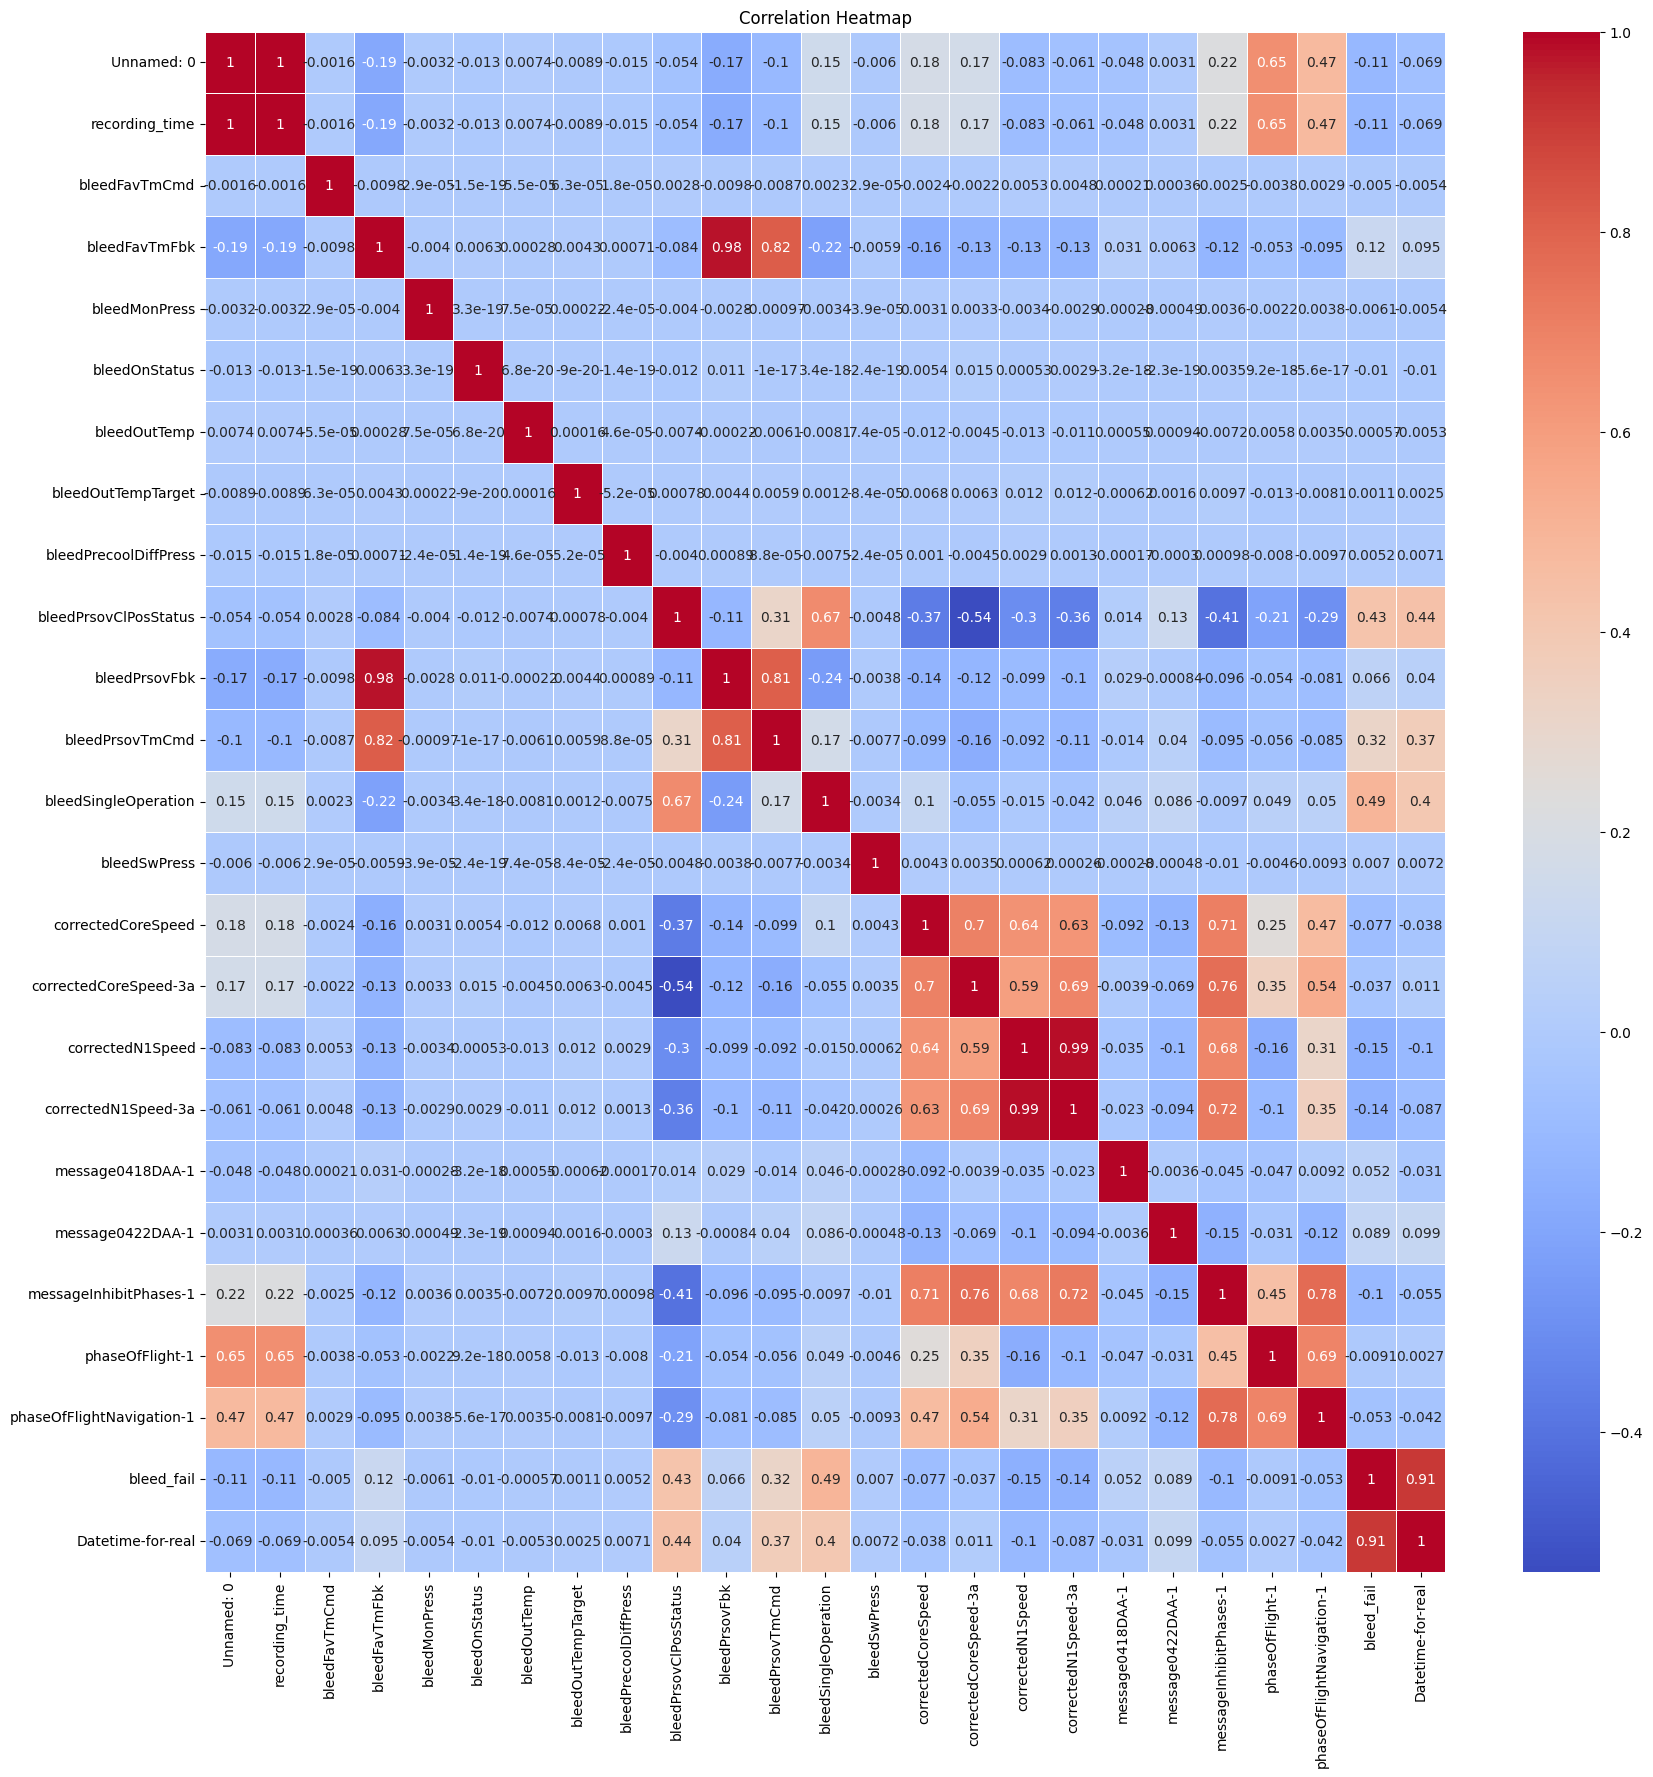

In [246]:
correlation = reduced_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [247]:

temp = analyze_column(dataframe=reduced_df, column='bleedFavTmFbk')

fit1 = SimpleExpSmoothing(temp, initialization_method="heuristic").fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

print(fcast1)

model = SimpleExpSmoothing(temp, initialization_method="estimated")
results = model.fit(smoothing_level=0.2, optimized=False)

forecast = results.forecast(3)

print(forecast)



# fit2 = SimpleExpSmoothing(temp, initialization_method="heuristic").fit(smoothing_level=0.6, optimized=False)
# fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

# fit3 = SimpleExpSmoothing(temp, initialization_method="estimated").fit()
# fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

# plt.figure(figsize=(12, 8))
# plt.plot(temp, marker="o", color="black")
# plt.plot(fit1.fittedvalues, marker="o", color="blue")
# (line1,) = plt.plot(fcast1, marker="o", color="blue")
# plt.plot(fit2.fittedvalues, marker="o", color="red")
# (line2,) = plt.plot(fcast2, marker="o", color="red")
# plt.plot(fit3.fittedvalues, marker="o", color="green")
# (line3,) = plt.plot(fcast3, marker="o", color="green")
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name,fcast3.name])

19273   -2.323091
19274   -2.323091
19275   -2.323091
Name: $\alpha=0.2$, dtype: float64
19273   -2.323091
19274   -2.323091
19275   -2.323091
dtype: float64


/home/hallzero/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hallzero/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/hallzero/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/hallzero/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hallzero/.local/lib/python3.10/site-packages/st

In [248]:
# Fit an exponential smoothing model (e.g., Holt-Winters)
model = ExponentialSmoothing(reduced_df['bleedFavTmFbk'], trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

# Generate forecasts
forecast = results.forecast(steps=12)  # Change the number of steps as needed

print(forecast)


19273    3.676422
19274    2.772192
19275    3.008501
19276    6.487533
19277    3.537034
19278    2.221343
19279    0.674288
19280    1.585754
19281   -1.864857
19282   -0.830504
19283    0.627685
19284    2.841648
dtype: float64


In [249]:
# Evaluating the model
print(results.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:            bleedFavTmFbk   No. Observations:                19273
Model:             ExponentialSmoothing   SSE                        4496447.068
Optimized:                         True   AIC                         105114.904
Trend:                         Additive   BIC                         105240.767
Seasonal:                      Additive   AICC                        105114.939
Seasonal Periods:                    12   Date:                 Wed, 06 Sep 2023
Box-Cox:                          False   Time:                         12:57:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9245143                alpha                 True
smoothing_trend          

In [259]:

actual = reduced_df['bleedFavTmFbk'][-12:]
predicted = forecast

print('mean', actual.mean(), reduced_df['bleedFavTmFbk'].mean())

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

mean -1.25 -59.69673896124112
Mean Absolute Error (MAE): 3.4138960755231147
Mean Squared Error (MSE): 15.456077663016998
Root Mean Squared Error (RMSE): 3.931421837327686


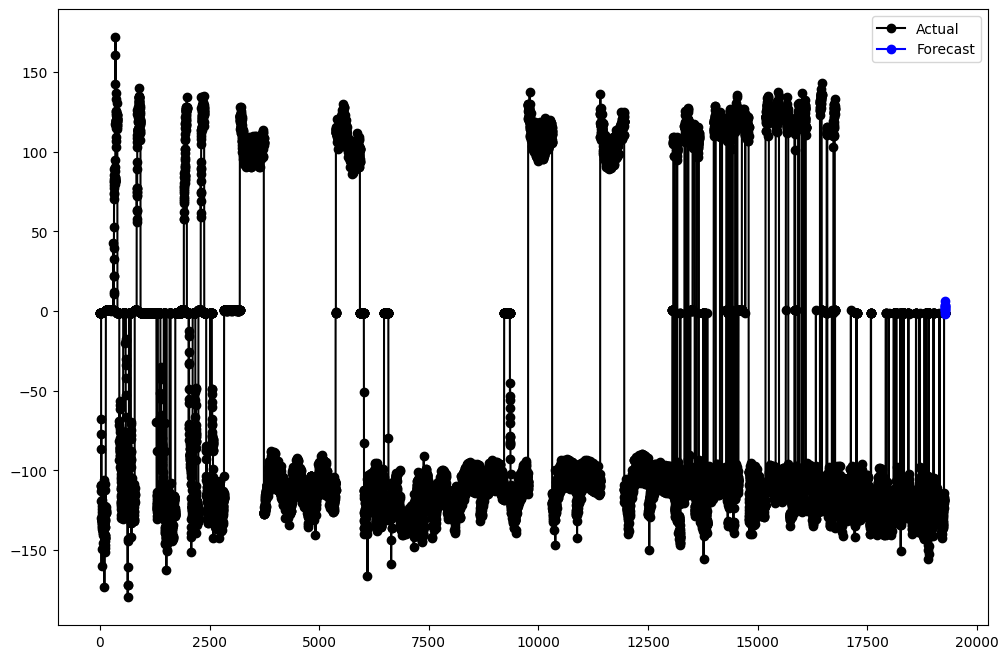

In [251]:
# ploting the forecast
plt.figure(figsize=(12, 8))
plt.plot(reduced_df['bleedFavTmFbk'], marker="o", color="black")
plt.plot(forecast, marker="o", color="blue")
plt.legend(['Actual', 'Forecast'])
plt.show()

In [252]:
with open('exponentialSmoothing.pkl', 'wb') as file:
    pickle.dump(results, file)